# Normalverteilung: $\mu$ und $\sigma$ bestimmen
In diesem Blog wird es sehr mathematisch. Wir werden eine Menge ableiten und herleiten. Wenn Du also Freude am Formelnreiten hast, solltest Du Dich an die gute alte Zeit aus dem Mathe LK erinnert fühlen. Mir hat diese Fingerübung so viel Spaß bereitet, dass ich beschlossen habe, diesen kleinen Blog zu schreiben.

## Die Normalverteilung
Maschinelles Lernen braucht viele Daten, um den richtigen Algorithmus erlernen zu können. Wenn man zum Beispiel ein ML Verfahren entwickelt, dass das Wetter der nächsten Tage bestimmen soll, braucht man möglichst viele Messwerte (Datum, Temperatur, Feuchtigkeit, Luftdruck, …) aus der Vergangenheit. Natürlich darf man den Daten, mit denen man seinen Algorithmus füttert nicht blind vertrauen. Man muss sich auf jeden Fall seiner Qualität vergewissern, um nicht etwas Falsches zu lernen. Da man sich zumeist nicht jeden Datensatz einzeln anschauen kann, verwendet man statistische Verfahren, um etwaige Ausreißer und Fehler herausfiltern zu können.

Die Normalverteilung ist eins der wesentlichen Werkzeuge der Analysten. Wenn man die Qualität der Daten bestimmen möchte, mit denen man einen Algorithmus für maschinelles Lernen (Random Forest, Neuronale Netze, …) füttert, ist die Normalverteilung ein absolutes Grundwerkzeug. Dabei geht es darum, einen Ausdruck zu finden, wie wahrscheinlich ein durchschnittliches Ergebnis ist. Eine Frau in Deutschland ist zum Beispiel durchschnittlich 1,66m groß. Aber natürlich sind nicht alle Frauen in Deutschland 1,66m groß. Die Normalverteilung kann für diesen Fall eine quantitative Aussage treffen, wie groß die Wahrscheinlichkeit ist, dass die nächste Frau, die Du siehst 1,66m, 1,80m oder 1,25m groß ist. Die Normalverteilung gehorcht dabei folgender Gleichung:

### $$f(\mu, \sigma, x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$$

Die Fläche unter dieser Funktion ist immer 1. Somit eignet sie sich eben perfekt für die Analyse von Stichproben, da die absolute Menge der Proben immer auf 1 normiert wird.
Ich möchte mich auf die beiden Formfaktoren σ und μ der Gleichung konzentrieren, die die allgemeine Normalverteilung auf jede spezielle Stichprobe anpasst. Im Folgenden werde ich Schritt für Schritt herleiten, wie man aus einer Menge von Messungen (zum Beispiel die Körpergröße von einhundert Frauen in Deutschland) die beiden Faktoren herleitet.

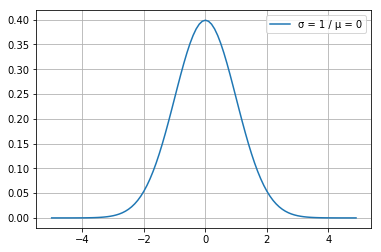

Abb 1: Normalverteilung für σ = 1 und µ = 0


In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.arange(-5, 5, 0.1)
y = [1 / math.sqrt(2 * math.pi) * math.exp(-0.5 * x**2) for x in x]

plt.plot(x,y, label="σ = 1 / µ = 0")
plt.grid(True)
plt.legend()
plt.show()
print("Abb 1: Normalverteilung für σ = 1 und µ = 0")

## Formfaktor: $\mu$ der Erwartungswert

Der Erwartungswert ist schlichtweg der Mittelwert. Damit verschiebt man das Maximum der Kurve auf den Durchschnittswert.

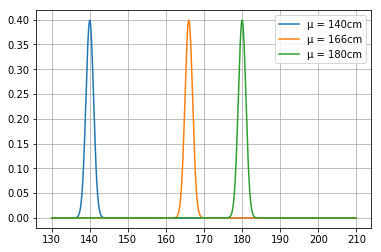

Abb 2: Normalverteilung für σ = 1 und µ = 140cm oder 166cm oder 180cm


In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.arange(130, 210, 0.1)
y_klein =  [1 / math.sqrt(2 * math.pi) * math.exp(-0.5 * (x - 140)**2) for x in x]
y_mittel = [1 / math.sqrt(2 * math.pi) * math.exp(-0.5 * (x - 166)**2) for x in x]
y_gross =  [1 / math.sqrt(2 * math.pi) * math.exp(-0.5 * (x - 180)**2) for x in x]

plt.plot(x,y_klein,  label="µ = 140cm")
plt.plot(x,y_mittel, label="µ = 166cm")
plt.plot(x,y_gross,  label="µ = 180cm")
plt.grid(True)
plt.legend()
plt.show()
print("Abb 2: Normalverteilung für σ = 1 und µ = 140cm oder 166cm oder 180cm")

## Formfaktor: $\sigma$   die Varianz
Die Varianz gibt an, wie stark die Proben um den Mittelwert streuen. Wenn eine Schulklasse zum Beispiel eine Arbeit schreibt und 15 Kinder eine Eins und 15 Kinder eine Sechs schreiben, ist der Mittelwert eine 3, die Streuung ist aber extrem groß.

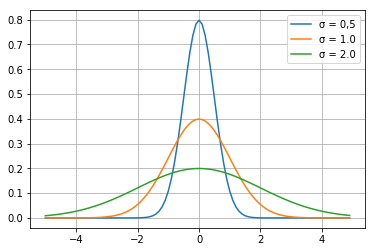

Abb 3: Normalverteilung für µ = 0 und σ = 0,5 oder σ = 1.0 oder σ = 2,0


In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.arange(-5, 5, 0.1)
y_klein =  [1 / math.sqrt(2 * math.pi * 0.5**2) * math.exp(-0.5 * (x)**2 / 0.5**2) for x in x]
y_mittel = [1 / math.sqrt(2 * math.pi * 1.0**2) * math.exp(-0.5 * (x)**2 / 1.0**2) for x in x]
y_gross =  [1 / math.sqrt(2 * math.pi * 2.0**2) * math.exp(-0.5 * (x)**2 / 2.0**2) for x in x]

plt.plot(x,y_klein,  label="σ = 0,5")
plt.plot(x,y_mittel, label="σ = 1.0")
plt.plot(x,y_gross,  label="σ = 2.0")
plt.grid(True)
plt.legend()
plt.show()
print("Abb 3: Normalverteilung für µ = 0 und σ = 0,5 oder σ = 1.0 oder σ = 2,0")

## Ein Beispiel
Nehmen wir noch einmal die Durchschnittsgröße von Frauen in Deutschland. Laut www.laenderdaten.info ist sie 1,66m. Ich schätze nun ein σ von 12 und errechne die Wahrscheinlichkeit, dass ich als nächstes eine Frau mit 1,40m oder 1,66m oder 1,90m treffe.

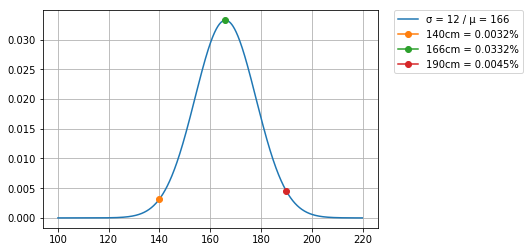

Abb 4: Normalverteilte Körpergrößen von Frauen in Deutschland mit einem µ = 166cm und σ = 12


In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

sigma = 12
mu = 166

f = lambda x :  1 / math.sqrt(2 * math.pi * sigma**2) * math.exp(-0.5 * (x - mu)**2 / sigma**2)

x = np.arange(100, 220, 0.1)
y =  [f(x) for x in x]

plt.plot(x,y,  label="σ = 12 / µ = 166")

h = 140
plt.plot(h, f(h),'o-',  label="{}cm = {:.2f}%".format(h, f(h)*100))
h = 166
plt.plot(h, f(h),'o-',  label="{}cm = {:.2f}%".format(h, f(h)*100))
h = 190
plt.plot(h, f(h),'o-',  label="{}cm = {:.2f}%".format(h, f(h)*100))

plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()
print("Abb 4: Normalverteilte Körpergrößen von Frauen in Deutschland mit einem µ = 166cm und σ = 12")


Die Wahrscheinlichkeit, dass ich alle drei Frauen als nächstes treffe ist somit das Produkt aus den Einzelergebnissen:
$$L(\mu = 166, \sigma = 12, x_1 = 140, x_2 = 166, x_3 = 190) \approx 0,0032 * 0,0332 * 0,0045 \approx 4,8E^{-7}$$

## Herleitung der Formfaktoren
### Das Produkt

Nun stellt sich die Frage: Wie kann man aus einer Menge von Testergebnissen die beiden Formfaktoren σ und μ herleiten? Dazu gehe ich noch einmal zurück zum Beispiel, in dem man sehen kann, dass die Gesamtwahrscheinlichkeit das Produkt der Einzelwahrscheinlichkeiten ist:

### $$W(\mu,\sigma,x_i) = \prod_{i=1}^{n}\frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{1}{2}(\frac{x_i-\mu}{\sigma})^2}$$

Wichtig ist hier, dass alle x_i aus demselben Wahrscheinlichkeitsexperiment kommen müssen. Sie haben also alle das gleiche μ und das gleiche σ.

## Der Logarithmus
Man kann sich vergegenwärtigen, dass sich μ und σ gegenseitig nicht beeinflussen. Das μ verschiebt das Maximum der Kurve nach links oder rechts und das σ bestimmt die Höhe und die Breite der Kurve. Beide Parameter sind also voneinander entkoppelt und können einzeln betrachtet werden. Das gilt, solange alle x_i aus dem gleichen Wahrscheinlichkeitsexperiment kommen und somit das gleiche μ und σ haben. Diese Vorüberlegung führt zum nächsten Schritt. Ich will wissen, wo das μ maximal wird. Dazu müsste ich die Funktion nach μ ableiten:

### $$\frac{\partial W}{\partial \mu}$$

Das kann man machen ist wegen des Produkts der einzelnen x_i aber nicht sehr lustig. Man kann hier aber zu einem kleinen Trick greifen. Wir suchen ja den Ort des Maximums und nicht den Betrag. Also können wir uns ja eine Funktion suchen, die ihr Maximum an der gleichen Stelle hat, die sich aber schöner ableiten lässt. Und die gibt es. Wir nehmen einfach von dem gesamten Ausdruck den Logarithmus:

### $$ln(W(\mu,\sigma,x_i)) = ln(\prod_{i=1}^{n}\frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{1}{2}(\frac{x_i-\mu}{\sigma})^2})$$

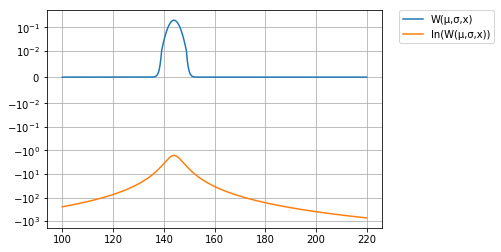

Abb 5: Normalverteilung und deren natürlicher Logarithmus für ein konstantes σ und x


In [102]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

sigma = 2
x = 144

f    = lambda mu :  1 / math.sqrt(2 * math.pi * sigma**2) * math.exp(-0.5 * (x - mu)**2 / sigma**2)
f_ln = lambda mu :  math.log(1 / math.sqrt(2 * math.pi * sigma**2) * math.exp(-0.5 * (x - mu)**2 / sigma**2))

mu = np.arange(100, 220, 0.1)

plt.plot(mu, [f(mu_i)    for mu_i in mu],  label="W(µ,σ,x)")
plt.plot(mu, [f_ln(mu_i) for mu_i in mu], label="ln(W(µ,σ,x))")

plt.yscale('symlog', linthreshy=0.01)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()
print("Abb 5: Normalverteilung und deren natürlicher Logarithmus für ein konstantes σ und x")

Der Logarithmus hat die schöne Eigenschaft, dass er alle Rechenoperationen quasi um einen grad heruntersetzt. Somit können wir den Ausdruck oben in sehr einfache Teile zerlegen:

### $\ln(\prod_{i=1}^{n}\frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{1}{2}(\frac{x_i-\mu}{\sigma})^2}) =$

### $\sum_{i=1}^n (\ln(\frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{1}{2}(\frac{x_i-\mu}{\sigma})^2})) =$

### $\sum_{i=1}^n (\ln(\frac{1}{\sqrt{2 \pi \sigma^2}}) + \ln(e^{-\frac{1}{2}(\frac{x_i-\mu}{\sigma})^2})) =$

### $\sum_{i=1}^n (\ln((2 \pi \sigma^2)^{-\frac{1}{2}}) -\frac{(x_i-\mu)^2}{2\sigma^2} \ln(e)) =$

### $\sum_{i=1}^n (-\frac{1}{2} \ln(2 \pi \sigma^2) -\frac{(x_i-\mu)^2}{2\sigma^2} \ln(e)) =$

### $\sum_{i=1}^n (-\frac{1}{2} \ln(2 \pi) -\frac{1}{2} \ln(\sigma^2) -\frac{(x_i-\mu)^2}{2\sigma^2} \ln(e)) =$

### $\sum_{i=1}^n (-\frac{1}{2} \ln(2 \pi) - \ln(\sigma) -\frac{(x_i-\mu)^2}{2\sigma^2}) =$

### $$-\frac{n}{2} \ln(2 \pi) - n \ln(\sigma) - \sum_{i=1}^n \frac{(x_i-\mu)^2}{2\sigma^2}$$

## Die Kettenregel
Mit der Kettenregel lässt sich der Ausdruck nun sehr einfach nach μ ableiten:

### $\frac{\partial}{\partial \mu} (-\frac{n}{2} \ln(2 \pi) - n \ln(\sigma) - \sum_{i=1}^n \frac{(x_i-\mu)^2}{2\sigma^2}) =$

### $-0 - 0 - \sum_{i=1}^n \frac{2(x_i-\mu)1}{2\sigma^2} =$

### $-\sum_{i=1}^n \frac{(x_i-\mu)}{\sigma^2}$


## Das Maximum
Das Maximum einer Funktion findet man bekanntlich, indem man sie einmal ableitet und zu null setzt:

### $-\sum_{i=1}^n \frac{(x_i-\mu)}{\sigma^2} = 0$

### $-\sum_{i=1}^n (x_i-\mu)\frac{1}{\sigma^2} = 0$

### $-\frac{1}{\sigma^2}((-n\mu)\sum_{i=1}^n (x_i)) = 0$

### $n\mu = \sum_{i=1}^n (x_i)$

## $$\mu = \frac{\sum_{i=1}^n x_i}{n}$$

Die Formel für den Erwartungswert μ ist also der Mittelwert aller Einzelwahrscheinlichkeiten und das ist ja auch genau das Ergebnis, dass wir erwartet haben.

## Der nächste Parameter
Nun stellt sich die Frage, ob man den Logarithmus auch für die Herleitung der Varianz verwenden kann. Da wir oben aber festgestellt haben, dass die Parameter voneinander entkoppelt sind sollte auch das funktionieren.

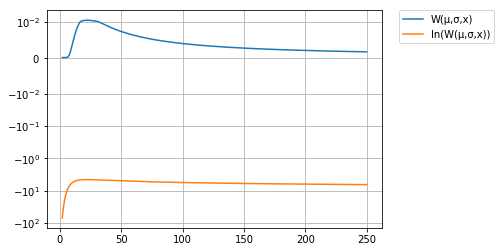

Abb 6: Normalverteilung und deren natürlicher Logarithmus für ein konstantes µ und x


In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

mu = 166
x = 144

f    = lambda sigma :  1 / math.sqrt(2 * math.pi * sigma**2) * math.exp(-0.5 * (x - mu)**2 / sigma**2)
f_ln = lambda sigma :  math.log(1 / math.sqrt(2 * math.pi * sigma**2) * math.exp(-0.5 * (x - mu)**2 / sigma**2))

sigma = np.arange(1.9, 250, 0.1)

plt.plot(sigma, [f(sigma_i)    for sigma_i in sigma],  label="W(µ,σ,x)")
plt.plot(sigma, [f_ln(sigma_i) for sigma_i in sigma], label="ln(W(µ,σ,x))")

plt.yscale('symlog', linthreshy=0.01)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()
print("Abb 6: Normalverteilung und deren natürlicher Logarithmus für ein konstantes µ und x")

Eine visuelle Inspektion ist ja bekanntlich kein Beweis, dass man auch hier den Logarithmus verwenden kann, um die Varianz herzuleiten. Somit glauben wir erst einmal der Behauptung, dass beide Kurven ihr Maximum an der gleichen Stelle haben und überprüfen, ob das Ergebnis plausibel erscheint:

## Simples Ableiten

### $\frac{\partial}{\partial \sigma} (-\frac{n}{2} \ln(2 \pi) - n \ln(\sigma) - \sum_{i=1}^n \frac{(x_i-\mu)^2}{2\sigma^2}) =$

### $\frac{\partial}{\partial \sigma} (-\frac{n}{2} \ln(2 \pi) - n \ln(\sigma) - \sum_{i=1}^n \frac{(x_i-\mu)^2}{2}\sigma^{-2}) =$

###  $-\frac{n}{\sigma} + \frac{1}{\sigma^3}\sum_{i=1}^n (x_i-\mu)^2$

## Das Maximum
Auch diese Gleichung wird wieder zu null gesetzt:

###  $-\frac{n}{\sigma} + \frac{1}{\sigma^3}\sum_{i=1}^n (x_i-\mu)^2 = 0$

###  $\sigma = \sqrt{ \frac{\sum_{i=1}^n (x_i-\mu)^2}{n}}$

Diese Formel kennt man als Statistiker auch. das ist nämlich die Standartabweichung. Also ein Maß für die Streuung von Stichproben um den Mittelwert. Damit sind die wichtigsten Werkzeuge für die Bewertung von Stichproben geschärft:

### Die Normalverteilung:

### $$f(\mu, \sigma, x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$$

### Der Erwartungswert:

### $$\mu = \frac{\sum_{i=1}^n x_i}{n}$$

### Die Varianz: 

### $$\sigma = \sqrt{ \frac{\sum_{i=1}^n (x_i-\mu)^2}{n}}$$